# Ordinary Differential Equations (ODEs)


In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

Let's look now at ODEs. Let's take one of the most famous physics examples:

$$
F_k(x) = m \ddot{x} = - k x
$$

This is the equation for the restoring force of a spring - this is an analytically solvable equation with the solution:

$$
x(t) = x_\mathrm{max} \cos\left(\sqrt{\frac{k}{m}} t\right)
$$

This is *harmonic motion*. Notice that we had to set some initial conditions here; the value of $x(0)=x_{\max}$ and $\dot{x}(0)=0$.



Before we discuss how Scipy does it, let us see how ODE are solved by using the simplest method, the Euler's rule:

$$
\frac{dy}{dt} = \frac{y(t+dt)-y(t)}{dt} = F(t,y)
$$
Then, a very simple approximations is given by
$$
y(t+dt) = y(t) + dt  F(t,y(t)) +O(dt^2)
$$



Now let's try to solve this numerically. We'll learn much better ways to do this, but for now, we are just going to use time steps and Euler’s algorithm.

Just remember that

$$
\frac{d^2x}{dt^2} = - x
$$

can be written as
$$
\frac{dx}{dt} = v\\
\frac{dv}{dt} = -x
$$


<font color="blue">

> Note: I learned something today from the IPython release notes. Type `\Delta` then press tab. Perfect for Python 3!

</font>

In [2]:
ΔT = 0.001  # timestep

# ΔT = 0.1  # timestep

steps = 10_000  # Total number of steps
x_max = 1  # Size of x max
v_0 = 0
koverm = 1  # k / m

# Compute the final values of t for plotting
ts = np.linspace(0, ΔT * (steps - 1), steps)

In [3]:
xs = np.empty(steps)
vs = np.empty(steps)

xs[0] = x_max
vs[0] = v_0

eoverm=[0.5*(vs[0]**2+koverm*xs[0]**2)]
    
for i in range(steps - 1):
    # Compute a based on *current* position
    a = - koverm * xs[i]

    # Compute next velocity
    vs[i + 1] = vs[i] - a * ΔT

    # Compute next position
    xs[i + 1] = xs[i] - vs[i] * ΔT
    
    # store the energy
    eoverm.append(0.5*(vs[i+1]**2+koverm*xs[i+1]**2))

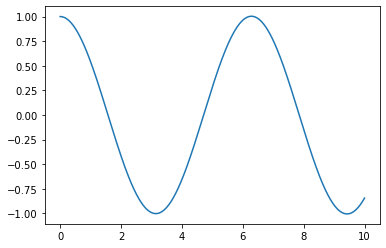

In [4]:
plt.plot(ts, xs)

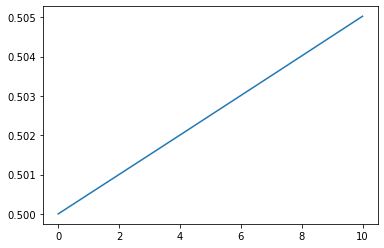

In [5]:
plt.plot(ts,eoverm)

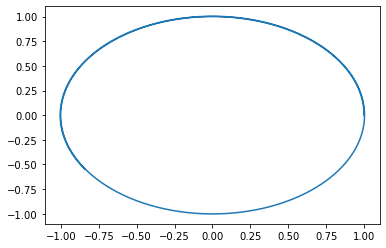

In [6]:
plt.plot(xs,vs)

#### Try it yourself

* What happens if you run more steps?
* What happens if you increase the step size?

For a better solver, we need to rewrite the equation to a standard form, a vector of first order ODEs:

$$
\ddot{x} = - \frac{k}{m} x
$$

As a series of first order equations by writing

$$
u = \left(
\begin{matrix}
\dot{x} \\
x
\end{matrix}
\right)
$$

Then,

$$
\dot{u} = \left(
\begin{matrix}
\ddot{x} \\
\dot{x}
\end{matrix}
\right) = \left(
\begin{matrix}
- \frac{k}{m} x \\
\dot{x}
\end{matrix}
\right)
$$

In [11]:
def f(t, y):
    "Y has two elements, x and v"

    return -koverm * y[1], y[0]


res = scipy.integrate.solve_ivp(f, [ts[0], ts[-1]], [1, 0], t_eval=ts)
print(res.message)

The solver successfully reached the end of the integration interval.


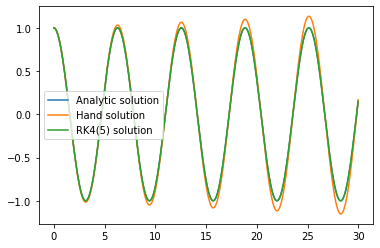

In [8]:
plt.plot(ts, np.cos(ts), label="Analytic solution")
plt.plot(ts, xs, label="Hand solution")
plt.plot(res.t, res.y[0], label="RK4(5) solution")
plt.legend()
plt.show()

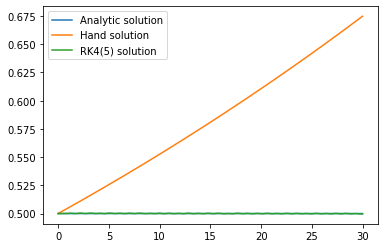

In [14]:
plt.plot(ts, (0.5*v_0**2+0.5*x_max**2)*np.ones(len(eoverm)), label="Analytic solution")
plt.plot(ts, eoverm, label="Hand solution")
plt.plot(res.t, 0.5*(res.y[0]**2+res.y[1]**2), label="RK4(5) solution")
plt.legend()
plt.show()